# Importing Libraries & Packages

In [318]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

## Read the Dataset

In [249]:
df=pd.read_csv("Tweets.csv")
df.head(50)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)
5,5.703010e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)
6,5.703010e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,24-02-2015 11:13,San Francisco CA,Pacific Time (US & Canada)
7,5.703000e+17,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,24-02-2015 11:12,Los Angeles,Pacific Time (US & Canada)
8,5.703000e+17,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,24-02-2015 11:11,San Diego,Pacific Time (US & Canada)
9,5.702950e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,24-02-2015 10:53,Los Angeles,Eastern Time (US & Canada)


In [250]:
df.isnull()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False
1,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False
2,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
4,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,False,False,False,True,False,False,True,False,True,False,False,True,False,True,True
14636,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True
14637,False,False,False,True,True,False,True,False,True,False,False,True,False,False,True
14638,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False


# Data cleaning


Check all missing values

In [251]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

negativereason , negativereason_confidence , airline_sentiment_gold , negativereason_gold , tweet_coord , tweet_location , user_timezone - these attributes has  large amount of missing values.

In [252]:
df.head(0)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone


<Axes: >

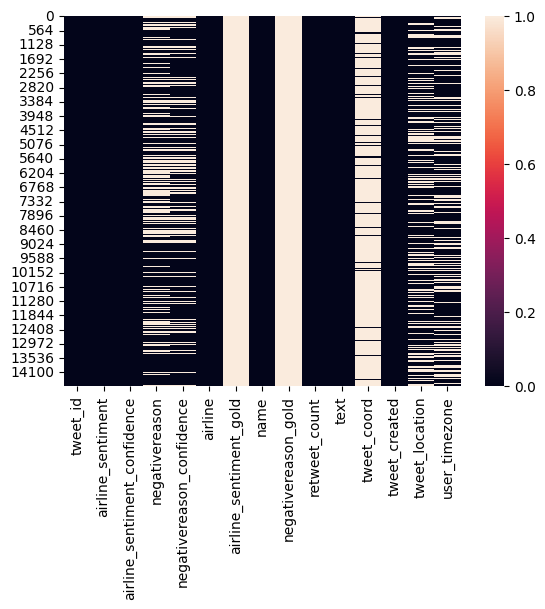

In [253]:
import seaborn as sns
sns.heatmap(df.isnull())

### Sentiment graph for Reaction

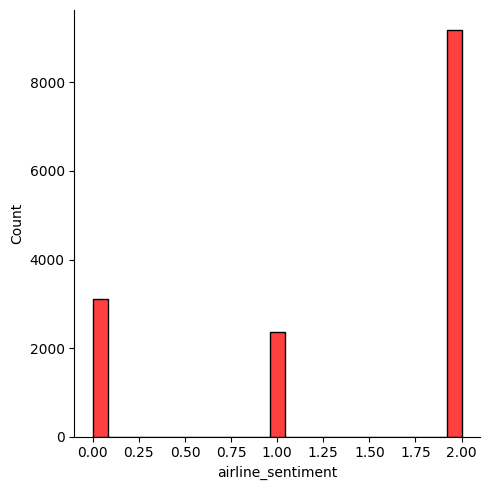

In [316]:
sns.displot(df['airline_sentiment'],color='red')

In [255]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791092e+14,0.162830,0.330440,0.745778
min,5.675880e+17,0.335000,0.000000,0.000000
25%,5.685590e+17,0.692300,0.360600,0.000000
50%,5.694780e+17,1.000000,0.670600,0.000000
75%,5.698902e+17,1.000000,1.000000,0.000000
max,5.703110e+17,1.000000,1.000000,44.000000


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

negativereason , negativereason_confidence , airline_sentiment_gold , negativereason_gold , tweet_coord , tweet_location , user_timezone - these attributes has  large amount of missing values.

### Handling missing values

negativereason , negativereason_confidence , airline_sentiment_gold , negativereason_gold , tweet_coord , tweet_location , user_timezone - these attributes has  large amount of missing values.

## Mode imputation of  negativereason

In [259]:

mode0=df[df['negativereason'].notna()]['negativereason'].mode()[0]
df['negativereason']= df['negativereason'].fillna(mode0)

In [260]:
df['negativereason']

0        Customer Service Issue
1        Customer Service Issue
2        Customer Service Issue
3                    Bad Flight
4                    Can't Tell
                  ...          
14635    Customer Service Issue
14636    Customer Service Issue
14637    Customer Service Issue
14638    Customer Service Issue
14639    Customer Service Issue
Name: negativereason, Length: 14640, dtype: object

In [261]:
df['negativereason'].isnull().sum()

0

## Median  imputation on negativereason_confidence

In [262]:

df['negativereason_confidence']=df['negativereason_confidence'].fillna(df['negativereason_confidence'].median())

In [263]:
df['negativereason_confidence']

0        0.6706
1        0.0000
2        0.6706
3        0.7033
4        1.0000
          ...  
14635    0.0000
14636    1.0000
14637    0.6706
14638    0.6659
14639    0.0000
Name: negativereason_confidence, Length: 14640, dtype: float64

In [264]:
df['negativereason_confidence'].isnull().sum()

0

## Mode imputation of  airline_sentiment_gold

In [265]:
mode2=df[df['airline_sentiment_gold'].notna()]['airline_sentiment_gold'].mode()[0]
df['airline_sentiment_gold']=df['airline_sentiment_gold'].fillna(mode2)

In [266]:
df['airline_sentiment_gold']

0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
14635    negative
14636    negative
14637    negative
14638    negative
14639    negative
Name: airline_sentiment_gold, Length: 14640, dtype: object

In [267]:
df['airline_sentiment_gold'].isnull().sum()

0

## Mode imputation of negativereason_gold

In [268]:
mode3=df[df['negativereason_gold'].notna()]['negativereason_gold'].mode()[0]
df['negativereason_gold']=df['negativereason_gold'].fillna(mode3)

In [269]:
df['negativereason_gold']

0        Customer Service Issue
1        Customer Service Issue
2        Customer Service Issue
3        Customer Service Issue
4        Customer Service Issue
                  ...          
14635    Customer Service Issue
14636    Customer Service Issue
14637    Customer Service Issue
14638    Customer Service Issue
14639    Customer Service Issue
Name: negativereason_gold, Length: 14640, dtype: object

In [270]:
df['negativereason_gold'].isnull().sum()

0

## Mode imputation of tweet_coord

In [271]:
mode4=df[df['tweet_coord'].notna()]['tweet_coord'].mode()[0]
df['tweet_coord']=df['tweet_coord'].fillna(mode4)

In [272]:
df['tweet_coord']

0        [0.0, 0.0]
1        [0.0, 0.0]
2        [0.0, 0.0]
3        [0.0, 0.0]
4        [0.0, 0.0]
            ...    
14635    [0.0, 0.0]
14636    [0.0, 0.0]
14637    [0.0, 0.0]
14638    [0.0, 0.0]
14639    [0.0, 0.0]
Name: tweet_coord, Length: 14640, dtype: object

In [273]:
df['tweet_coord'].isnull().sum()

0

## Mode imputation of tweet_location

In [274]:
mode5=df[df['tweet_location'].notna()]['tweet_location'].mode()[0]
df['tweet_location']=df['tweet_location'].fillna(mode5)

In [275]:
df['tweet_location']

0           Boston, MA
1           Boston, MA
2            Lets Play
3           Boston, MA
4           Boston, MA
             ...      
14635       Boston, MA
14636            Texas
14637    Nigeria,lagos
14638       New Jersey
14639       dallas, TX
Name: tweet_location, Length: 14640, dtype: object

In [276]:
df['tweet_location'].isnull().sum()

0

## Mode imputation of user_timezone

In [277]:
mode6=df[df['user_timezone'].notna()]['user_timezone'].mode()[0]
df['user_timezone']=df['user_timezone'].fillna(mode6)

In [278]:
df['user_timezone']

0        Eastern Time (US & Canada)
1        Pacific Time (US & Canada)
2        Central Time (US & Canada)
3        Pacific Time (US & Canada)
4        Pacific Time (US & Canada)
                    ...            
14635    Eastern Time (US & Canada)
14636    Eastern Time (US & Canada)
14637    Eastern Time (US & Canada)
14638    Eastern Time (US & Canada)
14639    Eastern Time (US & Canada)
Name: user_timezone, Length: 14640, dtype: object

In [279]:
df['user_timezone'].isnull().sum()

0

### After handling missing values check the cleaned data

In [280]:
df.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

### Check heatmap of cleaned dataset

<Axes: >

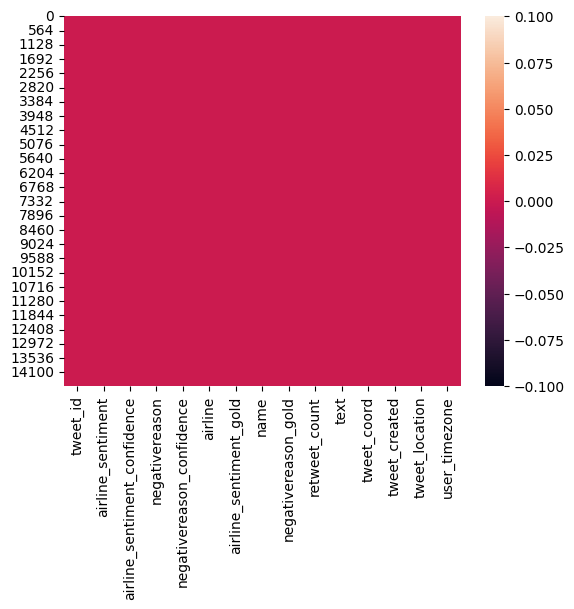

In [281]:
sns.heatmap(df.isnull())

## Now,there is no missing data in dataset

In [282]:
df['airline_sentiment']

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [283]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

### Replace the categorical feature to numerical data in airline sentiment reaction

In [284]:
df.replace({'airline_sentiment':{'neutral':0}},inplace=True)
df.replace({'airline_sentiment':{'positive':1}},inplace=True)
df.replace({'airline_sentiment':{'negative':2}},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_9708\2794109393.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'airline_sentiment':{'negative':2}},inplace=True)


### Sentiment graph plot

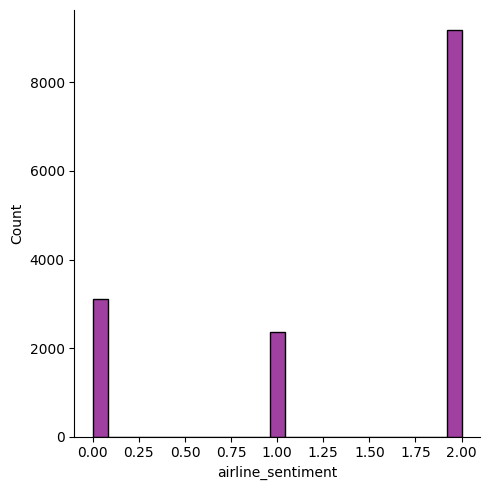

In [285]:
sns.displot(df['airline_sentiment'],color='purple')

In [286]:
df['airline_sentiment']

0        0
1        1
2        0
3        2
4        2
        ..
14635    1
14636    2
14637    0
14638    2
14639    0
Name: airline_sentiment, Length: 14640, dtype: int64

## import Libraries

In [287]:
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV


In [289]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Download the stopwords module

### Daily uses command

In [290]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Creating a function for clean the unecessary  comands from text content

In [291]:
port_stem=PorterStemmer()

In [292]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content



In [293]:
df['stemmed_content']=df['text'].apply(stemming)

In [294]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,stemmed_content
0,5.703060e+17,0,1.0000,Customer Service Issue,0.6706,Virgin America,negative,cairdin,Customer Service Issue,0,@VirginAmerica What @dhepburn said.,"[0.0, 0.0]",24-02-2015 11:35,"Boston, MA",Eastern Time (US & Canada),virginamerica dhepburn said
1,5.703010e+17,1,0.3486,Customer Service Issue,0.0000,Virgin America,negative,jnardino,Customer Service Issue,0,@VirginAmerica plus you've added commercials t...,"[0.0, 0.0]",24-02-2015 11:15,"Boston, MA",Pacific Time (US & Canada),virginamerica plu ad commerci experi tacki
2,5.703010e+17,0,0.6837,Customer Service Issue,0.6706,Virgin America,negative,yvonnalynn,Customer Service Issue,0,@VirginAmerica I didn't today... Must mean I n...,"[0.0, 0.0]",24-02-2015 11:15,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anoth ...
3,5.703010e+17,2,1.0000,Bad Flight,0.7033,Virgin America,negative,jnardino,Customer Service Issue,0,@VirginAmerica it's really aggressive to blast...,"[0.0, 0.0]",24-02-2015 11:15,"Boston, MA",Pacific Time (US & Canada),virginamerica realli aggress blast obnoxi ente...
4,5.703010e+17,2,1.0000,Can't Tell,1.0000,Virgin America,negative,jnardino,Customer Service Issue,0,@VirginAmerica and it's a really big bad thing...,"[0.0, 0.0]",24-02-2015 11:14,"Boston, MA",Pacific Time (US & Canada),virginamerica realli big bad thing


In [295]:
print(df['stemmed_content'])

0                              virginamerica dhepburn said
1               virginamerica plu ad commerci experi tacki
2        virginamerica today must mean need take anoth ...
3        virginamerica realli aggress blast obnoxi ente...
4                       virginamerica realli big bad thing
                               ...                        
14635          americanair thank got differ flight chicago
14636    americanair leav minut late flight warn commun...
14637    americanair pleas bring american airlin blackb...
14638    americanair money chang flight answer phone su...
14639    americanair ppl need know mani seat next fligh...
Name: stemmed_content, Length: 14640, dtype: object


In [296]:
X=df['stemmed_content'].values
Y=df['airline_sentiment'].values

### Train and Test and Split the data

In [297]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [298]:
print(X.shape,X_train.shape,X_test.shape)

(14640,) (11712,) (2928,)


In [299]:
print(X_train)

['usairway thank call cheapoairchat'
 'unit tonight made fred flintston happi upgrad st class http co gkgkzlawpr'
 'southwestair thank' ...
 'southwestair bernhardtjh eventu get flight cancel flightl decid drive gave hold process refund'
 'unit fli home event tomorrow push back flight ticket get home time'
 'jetblu flight den jfk alreadi hr delay idea might chang due weather forecast etc']


In [300]:
print(X_test)

['jetblu thank'
 'usairway go flight phl phx min estim departur nobodi board updat'
 'americanair ye thank found see gray tab first' ...
 'southwestair make flight fund forfeit show tri book anoth flight use fund'
 'usairway cancel flightl want put us hotel night guess'
 'unit someon miss connect flight airlin last flight day fix']


## Converting text data into numerical data for understanding ML Purposes

In [301]:
## Converting text data into numerical data
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


In [302]:
print(X_train)

  (0, 8637)	0.22992452432052907
  (0, 8052)	0.28304283148067094
  (0, 1113)	0.3590926953795947
  (0, 1309)	0.8591122771724313
  (1, 8533)	0.10351833510645304
  (1, 8244)	0.2465748104150846
  (1, 4878)	0.23375251504991643
  (1, 3022)	0.4312387234171083
  (1, 2888)	0.4312387234171083
  (1, 3485)	0.2673820998026499
  (1, 8608)	0.2514283355271054
  (1, 7639)	0.2591619017432782
  (1, 1413)	0.25470107574933204
  (1, 3767)	0.15691016432553495
  (1, 1473)	0.15676844381956842
  (1, 3251)	0.4312387234171083
  (2, 8052)	0.7531596019654002
  (2, 7554)	0.657837832575263
  (3, 8637)	0.1078382194962762
  (3, 6653)	0.20219206696348388
  (3, 5109)	0.5803158125733098
  (3, 3982)	0.33194135557355814
  (3, 8750)	0.3860512036413784
  (3, 5372)	0.2467855912291179
  (3, 2428)	0.2664574353092668
  :	:
  (11710, 8533)	0.12973162279979444
  (11710, 8168)	0.20885632263385995
  (11710, 3199)	0.18151613983423928
  (11710, 3669)	0.5512837247028779
  (11710, 2867)	0.1291972675716506
  (11710, 8149)	0.261306734098645

In [303]:
print(X_test)

  (0, 4213)	0.6693433715773979
  (0, 8052)	0.7429531956492289
  (1, 856)	0.26010990785242155
  (1, 1977)	0.3243337457566032
  (1, 2547)	0.4288852965932391
  (1, 2867)	0.12583203549904193
  (1, 3278)	0.22719015826048367
  (1, 5139)	0.253770168363529
  (1, 5543)	0.4245307673163359
  (1, 6137)	0.3186682476618947
  (1, 6150)	0.3491127866237835
  (1, 8604)	0.2964109896307781
  (1, 8637)	0.140870348274204
  (2, 268)	0.14779502235025627
  (2, 2828)	0.28152407376865757
  (2, 2993)	0.35235722877936454
  (2, 3363)	0.5490176734099672
  (2, 7191)	0.28281084567946607
  (2, 7925)	0.5260098763131569
  (2, 8052)	0.18087917137715182
  (2, 9275)	0.28972256697851
  (3, 771)	0.2519179622387721
  (3, 1131)	0.1478539352952149
  (3, 1840)	0.2441404612080607
  (3, 1949)	0.14973859015083812
  :	:
  (2925, 2973)	0.40674028704777815
  (2925, 3099)	0.7000225294821674
  (2925, 4898)	0.20185668385285846
  (2925, 7322)	0.25504616096698274
  (2925, 7554)	0.12607681505119533
  (2925, 8320)	0.1913853795040697
  (2925, 

### Model training using LogisticRegressionCV ML algo

In [319]:
from sklearn.linear_model import LogisticRegressionCV

In [305]:
model=LogisticRegressionCV(max_iter=1000)

In [306]:
model.fit(X_train,Y_train)

LogisticRegressionCV(max_iter=1000)

### Model Evaluation & Accuracy Score

In [307]:
from sklearn.metrics import accuracy_score

In [308]:
X_train_prediction=model.predict(X_train)
Train_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [309]:
print('Accuracy score on training data:' ,Train_data_accuracy)

Accuracy score on training data: 0.9095799180327869


In [310]:
X_test_prediction=model.predict(X_test)
Test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [311]:
print('Accuracy score on testing data:' ,Test_data_accuracy)

Accuracy score on testing data: 0.7790300546448088


### Creating a pickle file 

In [312]:
import pickle
filename='Trained_model.sav'
pickle.dump(model,open(filename,'wb'))


In [313]:
loaded_model=pickle.load(open('Trained_model.sav','rb'))

In [314]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,stemmed_content
0,5.703060e+17,0,1.0000,Customer Service Issue,0.6706,Virgin America,negative,cairdin,Customer Service Issue,0,@VirginAmerica What @dhepburn said.,"[0.0, 0.0]",24-02-2015 11:35,"Boston, MA",Eastern Time (US & Canada),virginamerica dhepburn said
1,5.703010e+17,1,0.3486,Customer Service Issue,0.0000,Virgin America,negative,jnardino,Customer Service Issue,0,@VirginAmerica plus you've added commercials t...,"[0.0, 0.0]",24-02-2015 11:15,"Boston, MA",Pacific Time (US & Canada),virginamerica plu ad commerci experi tacki
2,5.703010e+17,0,0.6837,Customer Service Issue,0.6706,Virgin America,negative,yvonnalynn,Customer Service Issue,0,@VirginAmerica I didn't today... Must mean I n...,"[0.0, 0.0]",24-02-2015 11:15,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anoth ...
3,5.703010e+17,2,1.0000,Bad Flight,0.7033,Virgin America,negative,jnardino,Customer Service Issue,0,@VirginAmerica it's really aggressive to blast...,"[0.0, 0.0]",24-02-2015 11:15,"Boston, MA",Pacific Time (US & Canada),virginamerica realli aggress blast obnoxi ente...
4,5.703010e+17,2,1.0000,Can't Tell,1.0000,Virgin America,negative,jnardino,Customer Service Issue,0,@VirginAmerica and it's a really big bad thing...,"[0.0, 0.0]",24-02-2015 11:14,"Boston, MA",Pacific Time (US & Canada),virginamerica realli big bad thing


### Creating the prediction to check my dataset is right or wrong

In [315]:
X_new = X_test[640]
print(Y_test[640])
prediction=model.predict(X_new)
print(prediction)

if (prediction[0]==1):
    print('positive tweet')
elif(prediction[0]==0):
    print('negative tweet')
else:
    print('neutral tweet')

2
[2]
neutral tweet


### Complete the Prediction and Model Building